In [3]:
import pandas as pd
df = pd.read_csv("pca_transformed_output.csv")
df.head()


,PC1,PC2,PC3,PC4,PC5,label
0,-2.032394,-1.940833,-2.920893,1.823003,-1.242805,1
1,-2.113285,1.149945,-0.508009,1.206858,0.390155,0
2,6.308554,0.292239,0.026216,-0.489533,0.653353,0
3,-2.046318,1.781729,-0.186375,1.015508,0.712101,1
4,6.214793,0.441817,-0.112234,-0.243980,0.261503,0


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv("pca_transformed_output.csv")

# Step 2: Split the data into features and target
# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Step 5: Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Step 6: Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, refit=True, verbose=2, cv=3)
grid_search.fit(X_train, y_train)

# Step 7: Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Step 8: Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weig

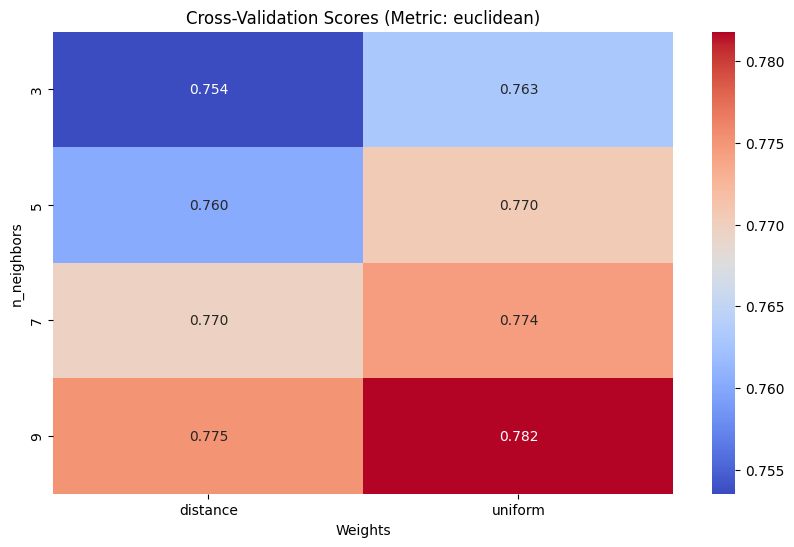

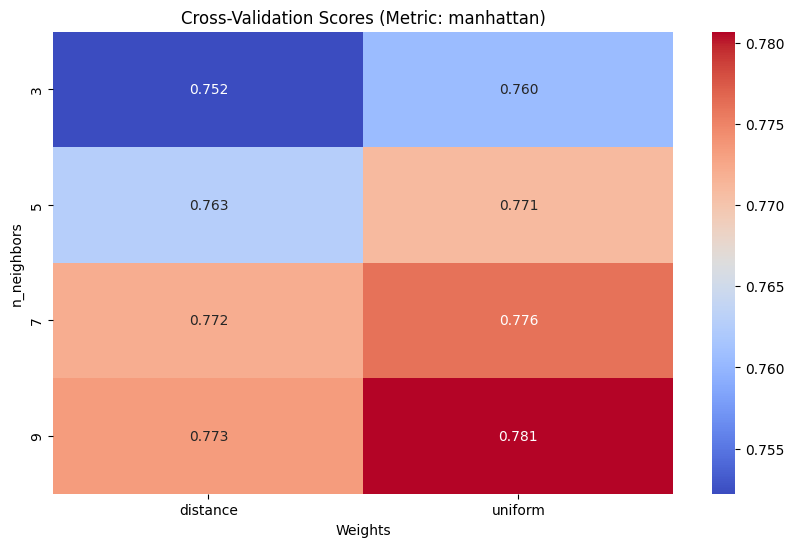

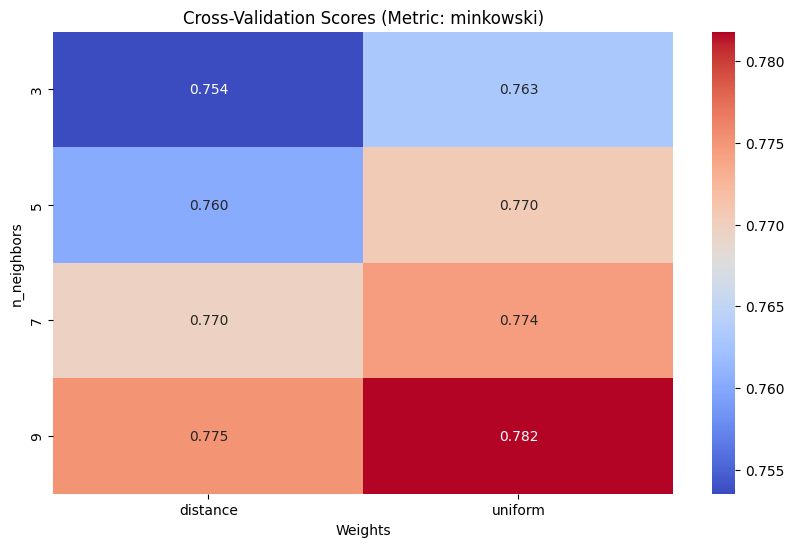

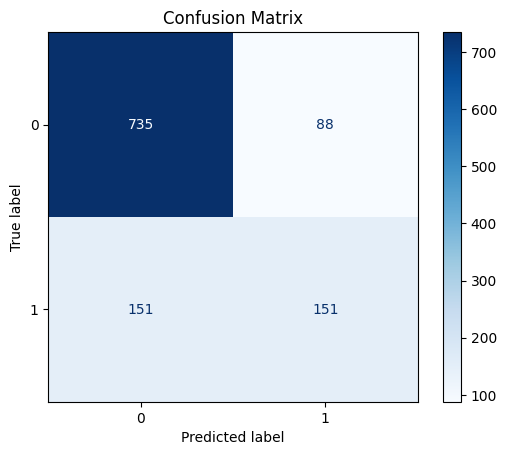

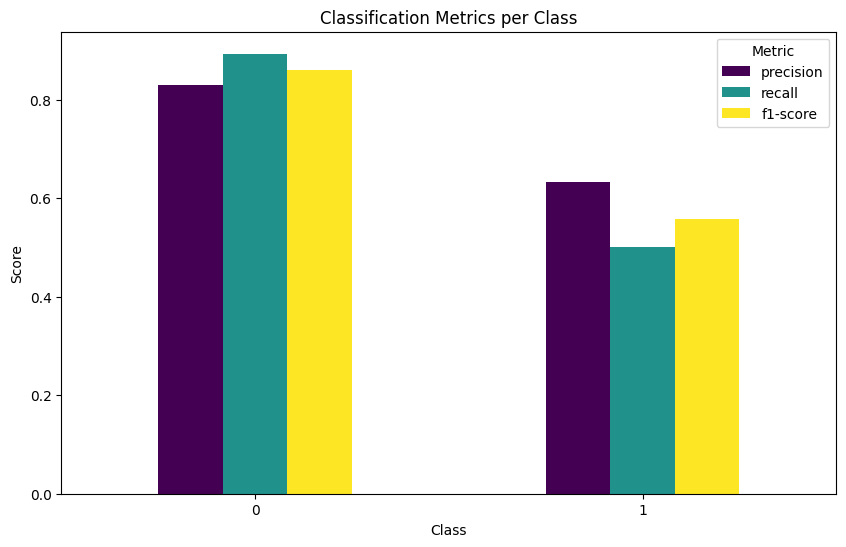

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Heatmap of cross-validation scores
# Step 1: Convert the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Extract unique values of parameters
n_neighbors_vals = param_grid['n_neighbors']
weights_vals = param_grid['weights']
metric_vals = param_grid['metric']

# Create a heatmap for each distance metric
for metric in metric_vals:
    # Filter results for the current metric
    metric_results = results[results['param_metric'] == metric]

    # Reshape mean test scores into a 2D array
    scores = metric_results.pivot(index='param_n_neighbors',
                                  columns='param_weights',
                                  values='mean_test_score')

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"Cross-Validation Scores (Metric: {metric})")
    plt.xlabel("Weights")
    plt.ylabel("n_neighbors")
    plt.show()


# Step 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Classification Report as a Bar Chart
from sklearn.metrics import classification_report
import pandas as pd

# Parse the classification report into a DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Exclude support and accuracy rows
metrics_df = report_df.loc[report_df.index[:-3], ["precision", "recall", "f1-score"]]

# Plot the metrics as a grouped bar chart
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Classification Metrics per Class")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.show()
